# Problemas de regresión

En los problemas de regresión asumimos que los estados de la naturaleza y acciones son reales, $\mathcal{H}=\mathcal{Y}=\mathbb{R}$. Las pérdidas más populares en este contexto son la **L2, $\ell_2$, cuadrática o error cuadrático,** asi como la **L1 o $\ell_1.$** También es bien conocida la **pérdida de Huber,** que combina L1 y L2 de acuerdo con un parámetro $\delta\geq 0.$
Formalmente, L1, L2 y Huber se definen como:
$$\begin{align*}
\ell_2(h,a)=(h-a)^2%
&&&& \ell_1(h,a)=\lvert{h-a}\rvert%
&&&& \ell_{\delta}(h,a)=\begin{cases}
\frac{(h-a)^2}{2} & \text{si $\lvert{h-a}\rvert\leq\delta$}\\[3mm]%
\delta\lvert{h-a}\rvert-\frac{\delta^2}{2} & \text{si $\lvert{h-a}\rvert>\delta$}%
\end{cases}%
\end{align*}$$

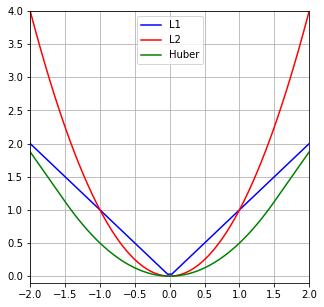

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
e = np.linspace(-3.0, 3.0, 100)
L1 = abs(e); L2 = np.square(e); delta = 1.5; i = abs(e) <= delta;
Huber = (abs(e)<=delta) * 0.5*L2 + (abs(e)>delta) * delta*(L1-delta/2);
plt.figure(figsize=(5, 5)); plt.xlim((-2, 2)); plt.ylim((-0.1, 4)); plt.grid(); 
plt.plot(e, L1, 'b'); plt.plot(e, L2, 'r'); plt.plot(e, Huber, 'g'); plt.legend(['L1', 'L2', 'Huber']);

L2 y L1 penalizan las desviaciones de la verdad de forma muy distinta: L2 las penaliza cuadráticamente, mientras que L1 lo hace linealmente. Por tanto, **L2 es más sensible a outliers** que L1; dicho de otra manera, **L1 es más robusta (insensible) frente a outliers** que L2. Huber representa un compromiso entre ambas.

## Pérdidas para $\mathbb{R}^D$

Las pérdidas usuales para $\mathbb{R}$ pueden extenderse fácilmente a $\mathbb{R}^D$ y usarse para calcular los parámetros óptimos que debe devolver un estimador, la acción óptima que debe realizar un robot, etc.